Matplotlib created a temporary cache directory at C:\Users\ATLANTIS\AppData\Local\Temp\matplotlib-7o4eyi_a because the default path (C:\Users\ATLANTIS\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


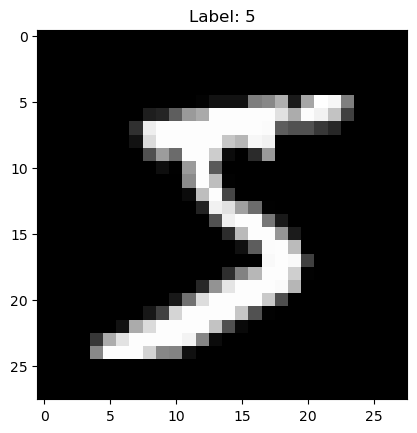

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.6634 - loss: 1.0290 - val_accuracy: 0.9418 - val_loss: 0.2075
Epoch 2/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.8986 - loss: 0.3291 - val_accuracy: 0.9538 - val_loss: 0.1477
Epoch 3/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9239 - loss: 0.2502 - val_accuracy: 0.9637 - val_loss: 0.1199
Epoch 4/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9378 - loss: 0.2077 - val_accuracy: 0.9726 - val_loss: 0.0919
Epoch 5/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9488 - loss: 0.1703 - val_accuracy: 0.9759 - val_loss: 0.0766
Epoch 6/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9582 - loss: 0.1420 - val_accuracy: 0.9789 - val_loss: 0.0665
Epoch 7/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9628 - loss: 0.1228 - val_accuracy: 0.9818 - val_loss: 0.0563
Epoch 8/10
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9679 -

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display a sample image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Reshape input data to include channel dimension
input_img_row = x_train.shape[1]
input_img_col = x_train.shape[2]
input_shape = (input_img_row, input_img_col, 1)

x_train = x_train.reshape(-1, input_img_row, input_img_col, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, input_img_row, input_img_col, 1).astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

# Compile the model
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=35,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)

# Evaluate on test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Save the model
model_file_path = input('Enter')
model.save(model_file_path)

# Load the saved model
loaded_model = load_model(model_file_path)

# Evaluate loaded model
loaded_score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("Loaded model test loss:", loaded_score[0])
print("Loaded model accuracy:", loaded_score[1])
print('Code is done!')
